<a href="https://colab.research.google.com/github/imprincesarraf/face-detection-face-recognition-and-emotion-detection/blob/main/Speech%20Emotion%20Recognition%20-%20Sound%20Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Import Modules**



In [1]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
import librosa
import librosa.display
from IPython.display import Audio
import warnings
warnings.filterwarnings('ignore')

In [26]:
paths = []
labels = []
for dirname, _, filenames in os.walk('/content/drive/MyDrive/archive (4)'):
    for filename in filenames:
        paths.append(os.path.join(dirname, filename))
        label = filename.split('_')[-1]
        label = label.split('.')[0]
        labels.append(label.lower())
    if len(paths) == 2800:
        break
print('Dataset is Loaded')

Dataset is Loaded


In [28]:
len(paths)

2800

In [29]:
labels[:5]

['angry', 'angry', 'angry', 'angry', 'angry']

In [30]:
paths[:5]

['/content/drive/MyDrive/archive (4)/TESS Toronto emotional speech set data/OAF_angry/OAF_beg_angry.wav',
 '/content/drive/MyDrive/archive (4)/TESS Toronto emotional speech set data/OAF_angry/OAF_bean_angry.wav',
 '/content/drive/MyDrive/archive (4)/TESS Toronto emotional speech set data/OAF_angry/OAF_bone_angry.wav',
 '/content/drive/MyDrive/archive (4)/TESS Toronto emotional speech set data/OAF_angry/OAF_bite_angry.wav',
 '/content/drive/MyDrive/archive (4)/TESS Toronto emotional speech set data/OAF_angry/OAF_bath_angry.wav']

In [31]:
## Create a dataframe
df = pd.DataFrame()
df['speech'] = paths
df['label'] = labels
df.head()


,speech,label
0,/content/drive/MyDrive/archive (4)/TESS Toront...,angry
1,/content/drive/MyDrive/archive (4)/TESS Toront...,angry
2,/content/drive/MyDrive/archive (4)/TESS Toront...,angry
3,/content/drive/MyDrive/archive (4)/TESS Toront...,angry
4,/content/drive/MyDrive/archive (4)/TESS Toront...,angry


In [32]:
df['label'].value_counts()

angry      400
disgust    400
fear       400
happy      400
neutral    400
ps         400
sad        400
Name: label, dtype: int64

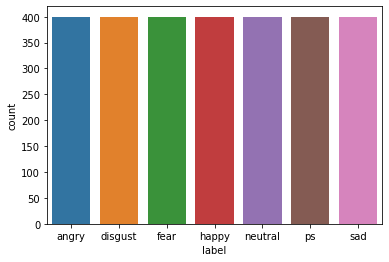

In [33]:
 sns.countplot(df['label'])


In [34]:
def waveplot(data, sr, emotion):
    plt.figure(figsize=(10,4))
    plt.title(emotion, size=20)
    librosa.display.waveplot(data, sr=sr)
    plt.show()
    
def spectogram(data, sr, emotion):
    x = librosa.stft(data)
    xdb = librosa.amplitude_to_db(abs(x))
    plt.figure(figsize=(11,4))
    plt.title(emotion, size=20)
    librosa.display.specshow(xdb, sr=sr, x_axis='time', y_axis='hz')
    plt.colorbar()

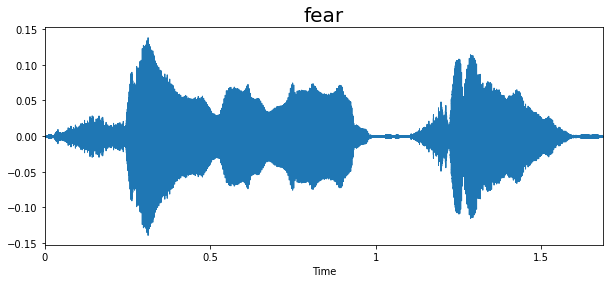

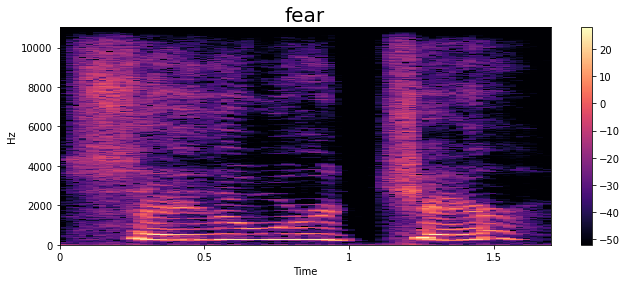

In [35]:
emotion = 'fear'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)